**COURSE PROYECT**

***Tell a story using data***

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Proyect Description**


***Context***

This project presents a market analysis to assess the feasibility of opening an automated café, run by robots, in the city of Los Angeles. The concept is innovative and appealing, but it comes with high initial costs, which led to the consideration of attracting investors. The main goal was to determine whether the business could sustain long-term success—even after the initial hype around robotic waitstaff fades.

To achieve this, a study was conducted using open-source data on restaurants in Los Angeles. Through exploratory data analysis, key market patterns, consumer behaviors, and common traits among successful establishments were identified. This report offers a comprehensive overview of the competitive landscape and provides valuable insights for strategic decision-making.


------------------------------------------------------------------------------------------------


**Data Description**

***dataset:*** rest_data

*object_name:* name of the establishment

*chain:* whether the establishment belongs to a chain (TRUE/FALSE)

*object_type:* type of establishment

*address:* address

*number_* number of seats



In [1]:
#Load Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

**Step 1. Data Cleaning**

In [2]:
#Download datasets 
rest_data = pd.read_csv("rest_data_us_upd (1).csv")


In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
# If there are columns that should be categorical:
rest_data['object_type'] = rest_data['object_type'].astype('category')

In [5]:
# Handling missing values (options: deletion, imputation, etc.)
print(rest_data.isnull().sum())  # See how many missing values there are per column

# Remove rows with missing values
rest_data = rest_data.dropna()

# Check and remove duplicates
rest_data = rest_data.drop_duplicates()

# Check again for missing or duplicated values
print("Missing values after processing:", rest_data.isnull().sum())
print("Number of duplicates after processing:", rest_data.duplicated().sum())


id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64
Missing values after processing: id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64
Number of duplicates after processing: 0


**Step 2. Data Analysis**

The proportions of the different types of establishments were analyzed and visually represented through a chart to facilitate comparison between categories."

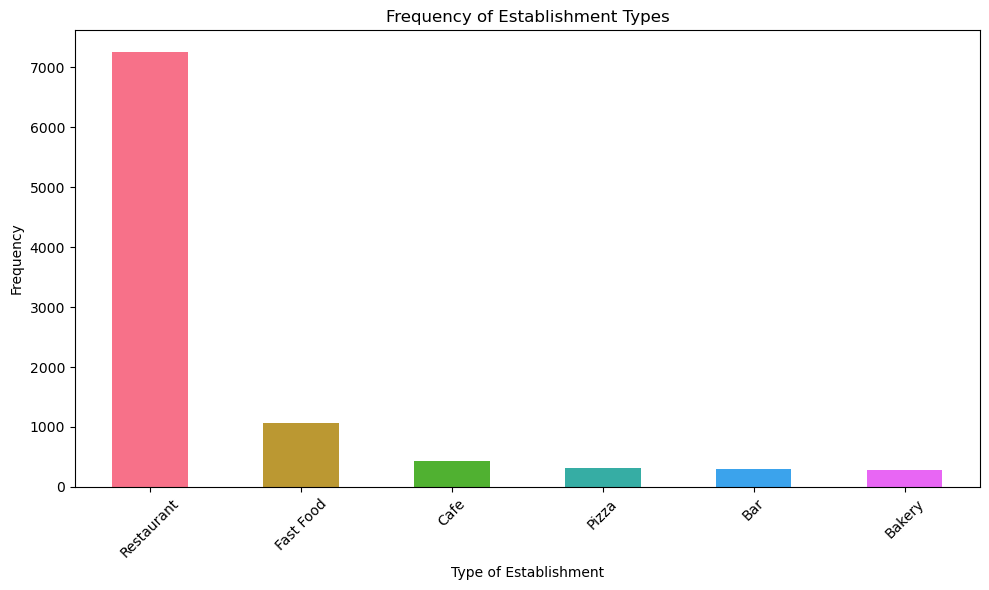

In [6]:
# Count the occurrences of each type in the 'object_type' column
frequencies = rest_data['object_type'].value_counts()

# Define a color palette with the same number of colors as categories in 'object_type'
colors = sns.color_palette('husl', len(frequencies))

# Plot the bar chart with different colors
plt.figure(figsize=(10,6))
frequencies.plot(kind='bar', color=colors)
plt.title('Frequency of Establishment Types')
plt.xlabel('Type of Establishment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.tight_layout()
plt.show()


*Observation:*


Restaurants overwhelmingly dominate the dataset, with a frequency surpassing 7,000 entries. In contrast, other types of establishments such as Fast Food, Cafes, Pizza places, Bars, and Bakeries have significantly lower counts, each well under 1,500. This suggests that traditional restaurants are by far the most common establishment type in the dataset.

***Proportions of chain-affiliated and non-chain establishments.***

In [7]:
rest_data['chain'].head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: chain, dtype: object

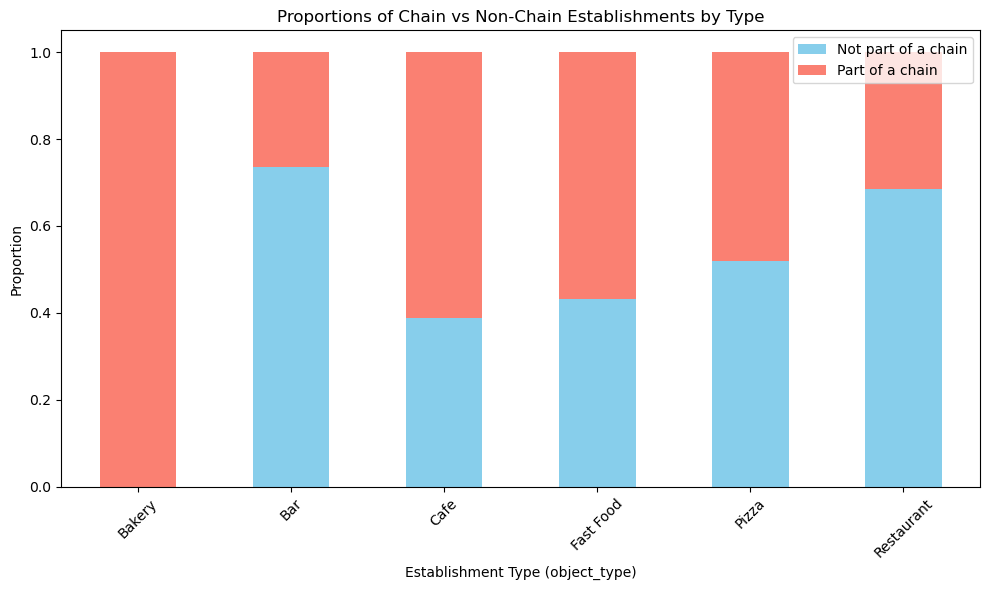

In [8]:
# Group by object type and chain status, then count
proportions = rest_data.groupby(['object_type', 'chain'], observed=False).size().unstack(fill_value=0)

# Calculate row-wise proportions (normalize by row)
normalized_proportions = proportions.div(proportions.sum(axis=1), axis=0)

# Plot a stacked bar chart
normalized_proportions.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Proportions of Chain vs Non-Chain Establishments by Type')
plt.xlabel('Establishment Type (object_type)')
plt.ylabel('Proportion')
plt.legend(['Not part of a chain', 'Part of a chain'], loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*Observation:*

The proportion of chain-affiliated establishments varies significantly by type. Bakeries are entirely composed of chain establishments, while Bars and Restaurants have a majority of independent (non-chain) businesses. Fast Food and Pizza establishments show a more balanced distribution, with chains being slightly more common. Cafés lean more toward chains, but still have a notable share of independents.

***What characterizes chain establishments: many with a small number of seats or a few with a lot of seats?****

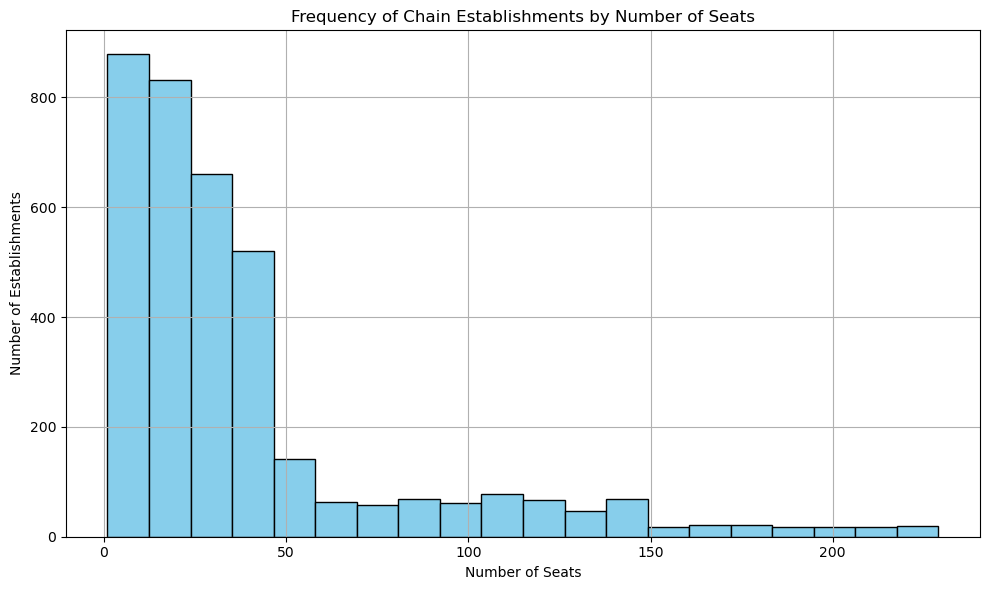

Median number of seats: 25.0


In [9]:
# Filter only the establishments that are part of a chain
chain_data = rest_data[rest_data['chain'] == True]

# Create a histogram to see the distribution of the number of seats
plt.figure(figsize=(10,6))
plt.hist(chain_data['number'], bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Frequency of Chain Establishments by Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Number of Establishments')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate the median number of seats
median_seats = chain_data['number'].median()
print(f'Median number of seats: {median_seats}')

From the chart, we can conclude that chain establishments are most commonly characterized by a higher frequency of locations with a lower number of seats. Only a few establishments have a high number of seats. The median number of seats is 25.

***Average number of seats for each type of restaurant***

In [14]:
# Group by 'object_type' and calculate the average number of seats
average_seats = rest_data.groupby('object_type', observed=True)['number'].mean().reset_index()

# Sort by the average number of seats in descending order
average_seats = average_seats.sort_values(by='number', ascending=False)

# Display the results
print(average_seats)

# Identify the type of restaurant with the highest average number of seats
max_seat_type = average_seats.iloc[0]['object_type']
max_seats = average_seats.iloc[0]['number']
print(f"The type of restaurant with the highest average number of seats is: {max_seat_type} with an average of {max_seats:.2f} seats.")




  object_type     number
5  Restaurant  48.048807
1         Bar  44.767123
3   Fast Food  31.837711
4       Pizza  28.545455
2        Cafe  25.000000
0      Bakery  21.773852
The type of restaurant with the highest average number of seats is: Restaurant with an average of 48.05 seats.


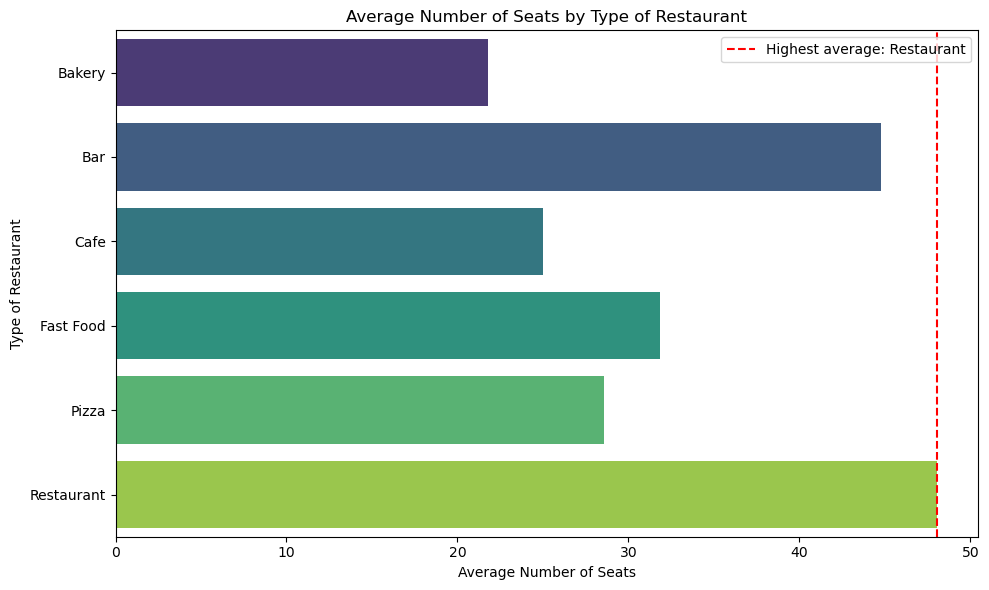

In [17]:
# Suppress FutureWarning messages to keep the output clean
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Plot a bar chart of the average number of seats by type of restaurant
plt.figure(figsize=(10,6))
sns.barplot(x='number', y='object_type', data=promedio_asientos, palette='viridis', estimator='mean')
plt.title('Average Number of Seats by Type of Restaurant')
plt.xlabel('Average Number of Seats')
plt.ylabel('Type of Restaurant')

# Highlight the type of restaurant with the highest average number of seats
plt.axvline(x=max_asientos, color='red', linestyle='--', label=f'Highest average: {tipo_max_asientos}')
plt.legend()

plt.tight_layout()
plt.show()



To extract the street names from the 'address' column and store them in a new column, we apply the following transformation

In [18]:
# Apply the function to the 'address' column to extract the street name
rest_data['street_name'] = rest_data['address'].apply(lambda x: ' '.join(x.split()[1:]))

# Display the first rows to verify the result
print(rest_data[['address', 'street_name']].head())


                   address         street_name
0   3708 N EAGLE ROCK BLVD   N EAGLE ROCK BLVD
1        100 WORLD WAY 120       WORLD WAY 120
2  6801 HOLLYWOOD BLVD 253  HOLLYWOOD BLVD 253
3       1814 W SUNSET BLVD       W SUNSET BLVD
4       2100 ECHO PARK AVE       ECHO PARK AVE


**Top ten best streets by number of restaurants**

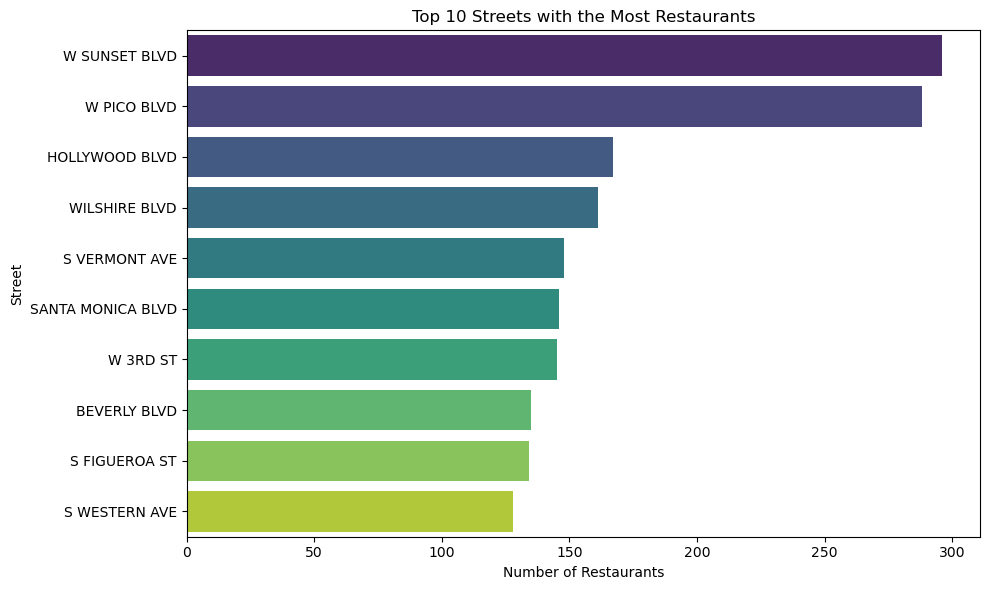

In [19]:
# Count the number of restaurants per street
top_streets = rest_data['street_name'].value_counts().head(10)

# Plot the top 10 streets with the most restaurants
plt.figure(figsize=(10,6))
sns.barplot(x=top_streets.values, y=top_streets.index, palette='viridis')
plt.title('Top 10 Streets with the Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Street')

plt.tight_layout()
plt.show()

**Number of streets that have only one restaurant**

In [20]:
# Count the number of restaurants per street
street_counts = rest_data['street_name'].value_counts()

# Filter the streets that have exactly one restaurant
streets_with_one_restaurant = street_counts[street_counts == 1]

# Count the number of streets that have only one restaurant
num_streets_one_restaurant = streets_with_one_restaurant.count()

print(f'Number of streets with only one restaurant: {num_streets_one_restaurant}')

Number of streets with only one restaurant: 2445


**Streets with many restaurants and their seat count distribution**

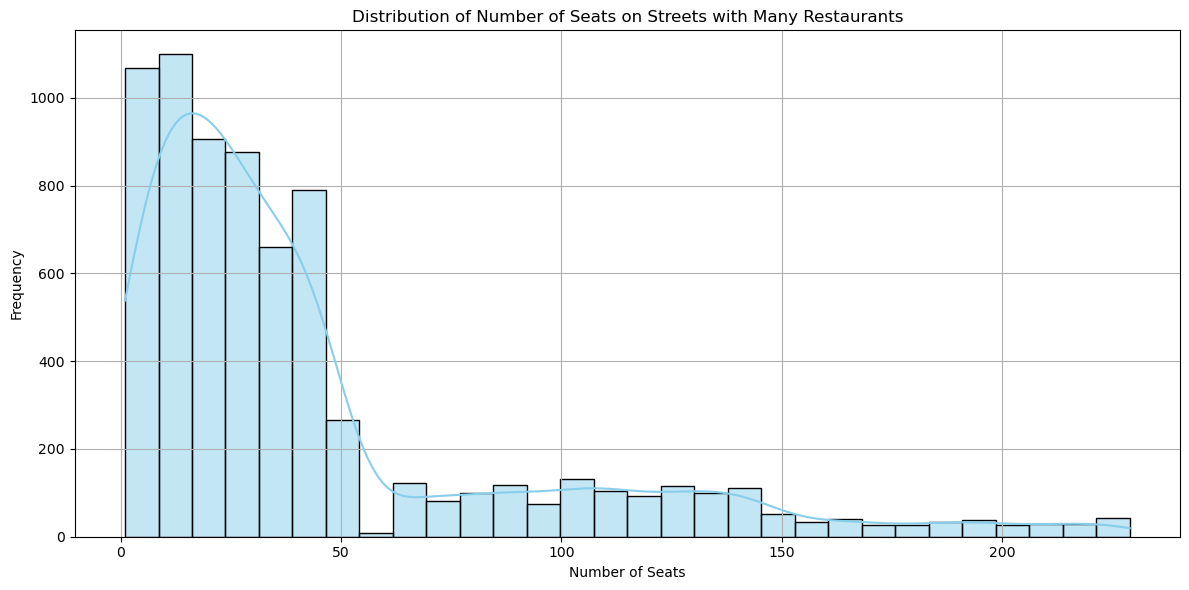

In [21]:
# Count the number of restaurants per street
street_counts = rest_data['street_name'].value_counts()

# Filter streets with more than one restaurant
streets_with_many_restaurants = street_counts[street_counts > 1].index

# Filter the data to include only those streets
data_many_restaurants = rest_data[rest_data['street_name'].isin(streets_with_many_restaurants)]

# Plot the distribution of the number of seats on streets with many restaurants
plt.figure(figsize=(12, 6))
sns.histplot(data_many_restaurants['number'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Seats on Streets with Many Restaurants')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

*Observation:*

Most restaurants have a low number of seats, as the chart is heavily concentrated in the initial intervals (between 0 and 50 seats). This indicates that small to medium-sized restaurants in terms of seating capacity are predominant on these streets. As the number of seats increases, the frequency drops sharply. Although there are some restaurants with more than 50 seats, they are significantly less common. There are a few cases of restaurants with between 150 and 200 seats, but these are much rarer, suggesting the presence of some large restaurants, which are a minority.

The distribution has a single peak, meaning that the highest concentration of restaurants has a number of seats around 0–25, while beyond that range, the frequency decreases rapidly.

**OVERALL CONCLUSIONS**

Most streets with many restaurants tend to have establishments that are small to medium in terms of seating capacity. There are some large restaurants, but they are much less common. As the number of seats increases, the frequency drops sharply. Although there are some restaurants with more than 50 seats, they are significantly less common. There are certain outliers — a few cases of restaurants with between 150 and 200 seats — but these are much rarer, suggesting the presence of a few large restaurants, which are the minority.

It could be suggested to consider restaurant models that optimize space, such as those with fast customer turnover or fast/casual food menus that still maintain quality. This type of restaurant could allow for a higher customer rotation with a limited number of seats. Another option would be to implement a hybrid model that combines dine-in service with takeout options, which could reduce the need for many seats while still meeting high demand.

A successful chain could develop a flexible concept that can adapt to different locations and sizes — for example, opening smaller venues in densely populated areas and expanding with larger locations in less saturated zones.